In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
nanostring=pd.read_csv("https://raw.githubusercontent.com/evcon131/cs345finalp/main/nanostring.csv")

# What does the data look like?
### Nanostring panel of 211 genes in 47 samples
* Controls and patients with T-zone lymphoma

In [3]:
nanostring

,Gene Name,Annotation,Probe Name,ctrl CD4 LN 35147,ctrl CD4 LN 35595,ctrl CD4 LN 35143,ctrl CD4 LN 35599,ctrl CD4 LN 35603,ctrl CD8 LN 35599,ctrl CD8 LN 35595,...,case 4n8n LN 38526,case 4n8n BL 36241,case 4n8n BL 36393,case 4n8n BL 37445,case 4n8n BL 38000,case 4n8n BL 38104,case 4n8n BL 39346,case 4n8n BL 42188,case 4n8n BL 39468,Unnamed: 51
0,NaN,NaN,NaN,20150826_206461150317_35147 cCD4_11.RCC,20150901_206461060317_35595 cCD4_11.RCC,20150903_206461070317_35143 cCD4_05.RCC,20150902_206461080317_35599 cCD4_11.RCC,20150902_206461080317_35603 cCD4_12.RCC,20150903_206461070317_35599 cCD8_10.RCC,20150902_206461080317_35595 cCD8_04.RCC,...,20150901_206461060317_38526 4n8n_09.RCC,20150826_206461150317_36241 4n8n_02.RCC,20150826_206461150317_36393 4n8n_04.RCC,20150826_206461150317_37445 4n8n_08.RCC,20150901_206461060317_38000 4n8n_03.RCC,20150901_206461060317_38104 4n8nRR_04.RCC,20150901_206461060317_39346 4n8n__12.RCC,20150902_206461080317_42188 4n8n_10.RCC,20150903_206461070317_39468 4-8-_02.RCC,NaN
1,NaN,NaN,NaN,ctrl,ctrl,ctrl,ctrl,ctrl,ctrl,ctrl,...,case,case,case,case,case,case,case,case,case,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A2A,NaN,NaN,28,32,27,35,47,145,99,...,192,34,92,179,51,257,103,326,698,NaN
4,ACTN1,NaN,NaN,855,1356,1179,1209,906,1153,1238,...,1150,1070,906,1713,1312,1143,2143,1232,1985,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,POS_B,NaN,NaN,12768,11216,11534,9340,8840,11301,10749,...,11459,10658,12670,12415,9965,11420,12448,10316,10452,NaN
223,POS_C,NaN,NaN,4297,3890,4049,2950,2872,3801,3407,...,3832,3563,4509,4147,3206,3973,4231,3370,3477,NaN
224,POS_D,NaN,NaN,996,846,852,644,652,822,806,...,857,804,1014,923,805,862,950,739,746,NaN
225,POS_E,NaN,NaN,150,148,122,89,91,104,97,...,111,125,171,138,118,117,129,115,125,NaN


## What do we need to do?
* Remove first 3 rows
* Remove last column, annotation and probe name
* Remove rows with control probes
* Transpose so samples are rows not columns
* Remove rows with missing values
* Create label column, control vs case

In [4]:
# Remove first 3 rows, last column
newdf=nanostring.iloc[3:,:51]
# Remove controls
newdf=newdf[newdf['Gene Name'].str.contains('POS_')!=True]
newdf=newdf[newdf['Gene Name'].str.contains('NEG_')!=True]
# Remove annotation and probe name
newdf.drop(newdf.columns[1:3], 
           axis=1, 
           inplace=True)
# Flip rows and columns
newdf=newdf.transpose()
# Make gene names column names, then drop that row
newdf.columns=newdf.loc['Gene Name']
newdf.drop('Gene Name',
         inplace=True)
# Get rid of index labels, make them a column
newdf.reset_index(inplace=True)
# Make label column
newdf['label']=newdf['index'].str.contains('ctrl')
newdf.loc[newdf['label'] == True, 'label'] = 'cntrl'
newdf.loc[newdf['label'] == False, 'label'] = 'tzn'
# Get rid of rows with NaN
newdf.dropna(inplace=True)



# Next classify
* Make feature maxtrix
* Make label list

In [5]:
#Create feature matrix: X, also make sure values are floats not strings
X=newdf.iloc[:,1:211].astype('float')
#Ceate labels: y
y=newdf['label']

## Load and classify
* Create classifier
* Create multiple train test splits(cross validation) to assess classifier accuracy
* Get genes contributing most to clasification *(Feature wieghts in linear algebra terms)*

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Create rando forest classifier
classifier = RandomForestClassifier(random_state=9005)
# Create cross validation train/test splits for classifier
cv = StratifiedKFold(n_splits=10, random_state=9001, shuffle=True)
# Measure accuracy of splits
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
np.mean(accuracy)

0.9800000000000001

In [7]:
#Fit Classifier
classifier.fit(X,y)
#Get importantance of genes(features)
gene_importancedf=pd.DataFrame({'Gene':X.columns,'Importance':classifier.feature_importances_})

In [8]:
#Get mpst important genes
gene_importancedf[gene_importancedf['Importance']==np.max(gene_importancedf['Importance'])]

,Gene,Importance
148,PTPRC b,0.061907


# How to predict

In [9]:
#Get one sample
sample=X.iloc[8,:]
#Need to do some reformatting for predict
sample=sample.values.reshape(1, -1)
#Predict based on gene expression
classifier.predict(sample)

/Users/evanconaway/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['cntrl'], dtype=object)

## Let's try some RNA-seq data
* RNA-seq of 7 controls, 7 cases
* Load the data, make a heat map

In [10]:
rnas=pd.read_csv("https://raw.githubusercontent.com/evcon131/cs345finalp/main/rnaseqdata.csv")
rnas

,Unnamed: 0,CD8_CI107031,CD8_CI107032,CD8_CI63491,CD4_CI107029,CD4_CI63500,CD4_CI77877,CD4_CI80398,TZL36988,TZL37555,...,FDR_CD8_CD4,cd8_mean,cd4_mean,tzn_mean,l2fc_tzn_cd8,l2fc_tzn_cd4,l2fc_cd8_cd4,symbol,uniprot_sym,hgnc_sym
0,ENSCAFG00000000001,0.000000,0.000000,0.000000,0.608668,0.000000,0.000000,0.000000,1.416440,2.275070,...,NaN,1.000000,0.152167,4.350906,2.121316,4.837589,2.716273,ENPP1,ENPP1,NaN
1,ENSCAFG00000000005,5.289699,0.869067,3.000856,1.826004,6.661359,0.000000,3.240284,5.665761,1.137535,...,0.980461,3.053207,2.931911,1.631726,-0.903927,-0.845443,0.058484,NaN,PARD6G,NaN
2,ENSCAFG00000000007,1071.164097,1003.772023,1086.309913,964.129861,1152.415028,817.502002,959.772009,538.247274,539.191638,...,0.726817,1053.748678,973.454725,573.557786,-0.877520,-0.763175,0.114345,ADNP2,ADNP2,NaN
3,ENSCAFG00000000008,350.001767,396.294409,279.079619,314.072606,287.390040,374.828362,333.749213,518.417111,528.953822,...,0.910252,341.791931,327.510055,481.850098,0.495466,0.557045,0.061579,TXNL4A,TXNL4A,NaN
4,ENSCAFG00000000009,515.745676,584.881880,569.162376,832.048939,606.183627,766.450110,596.212186,1322.955142,1737.016099,...,0.163808,556.596644,700.223716,1572.750107,1.498585,1.167402,-0.331184,SLC66A2,SLC66A2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15760,ENSCAFG00000050070,22.922030,14.774134,13.003710,3.043339,24.742189,9.404296,10.368908,104.816574,72.802246,...,0.699060,16.899958,11.889683,148.856754,3.138833,3.646143,0.507309,NaN,NaN,NaN
15761,ENSCAFG00000050078,1612.476653,1782.455775,1905.543633,1551.494328,1554.951408,2013.862778,1688.187767,4351.304280,3861.931668,...,0.904703,1766.825353,1702.124070,3526.366673,0.997023,1.050846,0.053823,NME2,NME2,NaN
15762,ENSCAFG00000050079,124.307932,114.716803,106.030249,52.345434,45.677887,69.188748,60.917332,22.663043,13.650421,...,0.001093,115.018328,57.032350,27.040675,-2.088661,-1.076649,1.012011,NaN,NaN,NaN
15763,ENSCAFG00000050080,13.224248,15.643200,15.004281,0.608668,3.806491,0.000000,0.000000,4.249321,1.137535,...,0.004873,14.623910,1.103790,2.317807,-2.657496,1.070296,3.727792,NaN,NaN,NaN


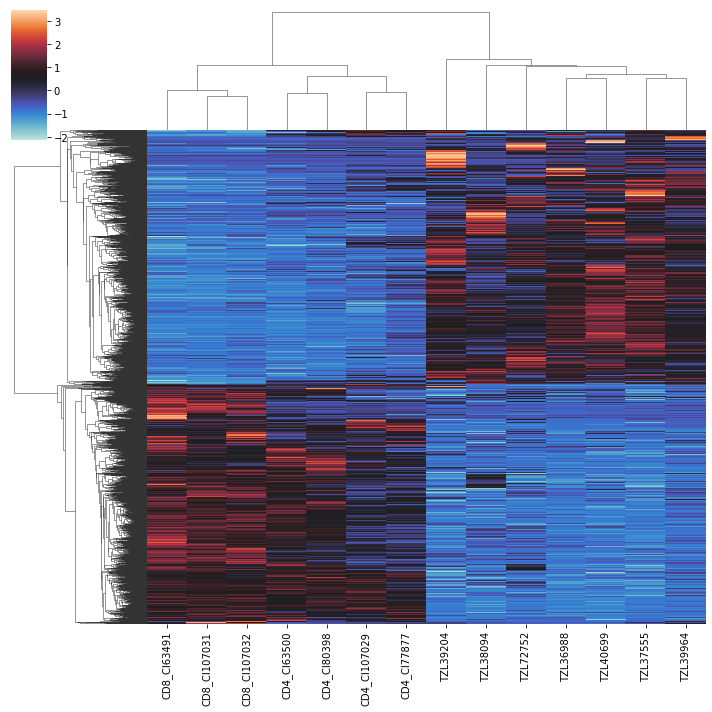

In [11]:
# Only sig genes
rnas=rnas[rnas["FDR_tzn_cd8"] < .01]
# Make feature matrix only gene counts
X=rnas.iloc[:,1:15].transpose()
# Make labels
y=np.repeat(['cntrl','tzn'],[7,7])
# Heatmap
sns.clustermap(rnas.iloc[:,1:15],
               z_score=0,
               cmap="icefire",
               yticklabels=False)

In [12]:
#Create classifier
classifier = RandomForestClassifier(random_state=9001)
#Create train/test splits to measure accurracy
cv = StratifiedKFold(n_splits=7, random_state=9001, shuffle=True)
#Measure train/test splits accurracy
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
#Fit 
classifier.fit(X,y)
print("Random Forest Accuracy: "+str(np.mean(accuracy)))

Random Forest Accuracy: 1.0


In [13]:
#Create importance df, 25th column is gene symbols
gene_importancedf=pd.DataFrame({'Gene':rnas[rnas["FDR_tzn_cd8"] < .01].iloc[:,24],'Importance':classifier.feature_importances_})

In [14]:
# Genes with highest importance
gene_importancedf[gene_importancedf['Importance']==np.max(gene_importancedf['Importance'])]

,Gene,Importance
15700,LOC111097478,0.02


# How to predict with classifier

In [15]:
#Get two samples
samples=X.iloc[6:8,:]
#Predict based on gene expression
classifier.predict(samples)

array(['cntrl', 'tzn'], dtype='<U5')